# Analysis Spectral Bands

## Packages and Data

In [4]:
import os
import sys

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.data_loader import DataLoader
from utils.calculate_indices import CalculateIndices
from utils.sits_outlier_cleaner import SITSOutlierCleaner
from utils.constants import spectral_bands, indices

In [6]:
dataloader = DataLoader()
df_base = dataloader.load_transform("../../data/Trainings_Datensatz.csv")
df = dataloader.date_feature_extraction(df_base)
df = dataloader.feature_extraction(df)

In [7]:
calculateindices = CalculateIndices()
df = calculateindices.add_all_indices(df)

## Strange Values

In [8]:
# 83 rows with reip = inf or -inf (because b5 = b6)
# 432 rows with mcari = inf (because b4 = 0)

In [9]:
df[df["reip"].isin([np.inf, -np.inf])]

,time,id,disturbance_year,doy,b2,b3,b4,b5,b6,b7,...,ndvi,gndvi,wdvi,tndvi,savi,ipvi,mcari,reip,masvi2,dvi
4006171,2022-08-09,212,2017,221,1396,2007,2821,3034,3034,3102,...,0.090147,0.214328,1969.5,0.768210,0.135209,0.545073,183.266076,-inf,-0.999704,559
3605850,2020-05-09,714,0,130,1007,1235,1560,1917,1917,2235,...,0.187923,0.288184,1502.0,0.829411,0.281848,0.593961,350.958462,-inf,-0.999562,722
3592392,2019-04-15,1262,0,105,226,348,153,115,115,130,...,-0.200000,-0.456067,25.5,0.547723,-0.299413,0.400000,-22.849673,inf,-0.990243,-51
3592393,2019-04-21,1262,0,111,154,240,74,39,39,60,...,-0.423077,-0.600000,-7.0,0.277350,-0.631579,0.288462,-14.756757,inf,-0.967195,-44
3592434,2020-06-30,1262,0,182,259,449,141,118,118,146,...,0.037543,-0.509244,81.5,0.733173,0.056218,0.518771,-15.398582,inf,-0.993442,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3808008,2020-05-07,25550,0,128,180,177,55,41,41,42,...,0.140625,-0.616438,45.5,0.800391,0.210117,0.570312,-8.349091,inf,-0.986393,18
3826525,2022-03-22,25844,2017,81,1715,2068,2213,2375,2375,2420,...,0.054071,0.078431,1359.5,0.744360,0.081098,0.527036,139.087212,-inf,-0.999595,253
3694661,2020-08-04,26853,0,217,1035,1555,2122,2370,2370,2522,...,0.141238,0.237184,1759.0,0.800774,0.211836,0.570619,221.587182,-inf,-0.999645,698
3745517,2018-10-15,27479,0,288,980,1201,1474,1633,1633,1795,...,0.099297,0.198264,1062.0,0.774143,0.148923,0.549649,140.921031,-inf,-0.999444,325


In [10]:
df[ (df["mcari"] == np.inf)] # b4 = 0 does not make sense, maybe anomaly? 
# Test if values still exists after anaomaly detection 

,time,id,disturbance_year,doy,b2,b3,b4,b5,b6,b7,...,ndvi,gndvi,wdvi,tndvi,savi,ipvi,mcari,reip,masvi2,dvi
2013218,2019-01-20,46,0,20,25,102,0,232,1007,1174,...,1.0,0.840125,1409.0,1.224745,1.499468,1.0,inf,-29.692903,-0.999291,1409
2013303,2021-12-21,46,0,355,51,83,0,89,471,623,...,1.0,0.764873,518.0,1.224745,1.498554,1.0,inf,-31.018325,-0.998071,518
2278527,2020-01-19,128,2020,19,53,31,0,31,73,66,...,1.0,0.360825,87.0,1.224745,1.491429,1.0,inf,-15.500000,-0.988571,87
3535295,2018-12-12,173,0,346,194,264,0,282,828,844,...,1.0,0.523466,1085.0,1.224745,1.499309,1.0,inf,-30.150183,-0.999079,1085
985164,2021-11-21,248,0,325,54,126,0,297,1273,1630,...,1.0,0.856492,1733.0,1.224745,1.499567,1.0,inf,-32.988730,-0.999423,1733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085085,2018-12-30,27635,0,364,177,75,0,172,628,642,...,1.0,0.790795,492.0,1.224745,1.498477,1.0,inf,-27.000000,-0.997970,492
3260476,2017-12-16,27897,0,350,29,93,0,242,1007,1261,...,1.0,0.862629,1097.0,1.224745,1.499317,1.0,inf,-32.368627,-0.999089,1097
1136457,2021-12-29,27916,0,363,57,124,0,196,813,1054,...,1.0,0.789474,1129.0,1.224745,1.499336,1.0,inf,-33.348460,-0.999115,1129
1771556,2019-12-05,28063,0,339,31,120,0,191,867,1119,...,1.0,0.806295,1441.0,1.224745,1.499480,1.0,inf,-32.353550,-0.999306,1441


## Why sometimes b5 = b6?

In [11]:
df[df["b6"] == df["b5"]].groupby("species").count()

,time,id,disturbance_year,doy,b2,b3,b4,b5,b6,b7,...,ndvi,gndvi,wdvi,tndvi,savi,ipvi,mcari,reip,masvi2,dvi
species,,,,,,,,,,,,,,,,,,,,,
Norway_spruce,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Norway_spruce_mixed,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
beech,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
soil,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80


In [12]:
df[df["b6"] == df["b5"]]

,time,id,disturbance_year,doy,b2,b3,b4,b5,b6,b7,...,ndvi,gndvi,wdvi,tndvi,savi,ipvi,mcari,reip,masvi2,dvi
4006171,2022-08-09,212,2017,221,1396,2007,2821,3034,3034,3102,...,0.090147,0.214328,1969.5,0.768210,0.135209,0.545073,183.266076,-inf,-0.999704,559
3605850,2020-05-09,714,0,130,1007,1235,1560,1917,1917,2235,...,0.187923,0.288184,1502.0,0.829411,0.281848,0.593961,350.958462,-inf,-0.999562,722
3592392,2019-04-15,1262,0,105,226,348,153,115,115,130,...,-0.200000,-0.456067,25.5,0.547723,-0.299413,0.400000,-22.849673,inf,-0.990243,-51
3592393,2019-04-21,1262,0,111,154,240,74,39,39,60,...,-0.423077,-0.600000,-7.0,0.277350,-0.631579,0.288462,-14.756757,inf,-0.967195,-44
3592434,2020-06-30,1262,0,182,259,449,141,118,118,146,...,0.037543,-0.509244,81.5,0.733173,0.056218,0.518771,-15.398582,inf,-0.993442,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3808008,2020-05-07,25550,0,128,180,177,55,41,41,42,...,0.140625,-0.616438,45.5,0.800391,0.210117,0.570312,-8.349091,inf,-0.986393,18
3826525,2022-03-22,25844,2017,81,1715,2068,2213,2375,2375,2420,...,0.054071,0.078431,1359.5,0.744360,0.081098,0.527036,139.087212,-inf,-0.999595,253
3694661,2020-08-04,26853,0,217,1035,1555,2122,2370,2370,2522,...,0.141238,0.237184,1759.0,0.800774,0.211836,0.570619,221.587182,-inf,-0.999645,698
3745517,2018-10-15,27479,0,288,980,1201,1474,1633,1633,1795,...,0.099297,0.198264,1062.0,0.774143,0.148923,0.549649,140.921031,-inf,-0.999444,325


In [13]:
def timeplot_twocols_oneid(df, col1, col2, id):
    df_sub = df[df["id"] == id]

    plt.plot(df_sub["time"], df_sub[col1], label=col1)
    plt.plot(df_sub["time"], df_sub[col2], label=col2)
    plt.title(f"{col1}, {col2} Timeseries for ID {id}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

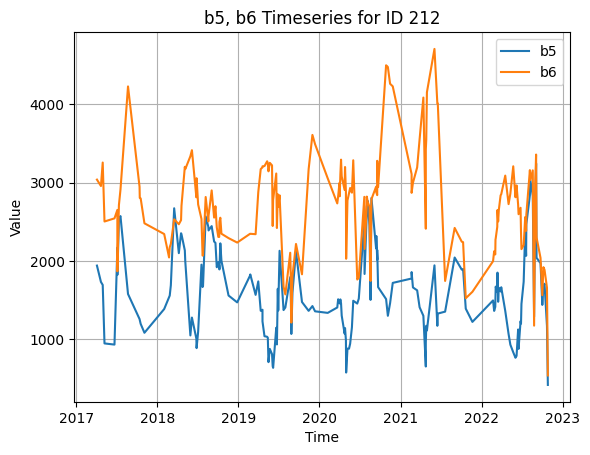

In [14]:
timeplot_twocols_oneid(df, "b5", "b6", 212)

## Test Anomaly Detection 
-> Are strange values removed?

### Apply Anomaly Detection

In [15]:
def get_sample_with_strange_values(df, id_col="id", time_col="time"):
    """df only with id's that once had reip=inf and mcari=inf"""
    ids_needed = pd.concat([
        df.loc[df["reip"].isin([np.inf, -np.inf]), id_col],
        df.loc[df["mcari"].isin([np.inf, -np.inf]), id_col]
    ]).drop_duplicates()

    df_sorted = df.sort_values(by=[id_col, time_col])

    return df_sorted[df_sorted[id_col].isin(ids_needed)]

In [16]:
spectral_bands

['b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b8a', 'b11', 'b12']

In [17]:
df_sample = get_sample_with_strange_values(df)

# cleaner = SITSOutlierCleaner()
# cleaner.fit_transform(df_sample, band_columns=spectral_bands)
# df_with_any_flag = cleaner.add_any_outlier_flag()
# id_df= df_with_any_flag[df_with_any_flag["id"]==24]
# df_clean = cleaner.get_interpolated_only()

# df_clean = dataloader.load_transform("../../data/df_sample_cleaned.csv")
# df_clean = dataloader.date_feature_extraction(df_clean)

# calculateindices = CalculateIndices()
# df_clean = calculateindices.add_all_indices(df_clean)

In [34]:
df_sub_cols = df_sample[["id", "time", "disturbance_year", "doy", "species"]]

In [35]:
df_clean = dataloader.load_transform("../../data/df_sample_cleaned.csv")
df_clean_new = df_clean.merge(df_sub_cols, on=["id", "time"], how="left")

In [42]:
df[df["id"]==16404]

,time,id,disturbance_year,doy,b2,b3,b4,b5,b6,b7,...,ndvi,gndvi,wdvi,tndvi,savi,ipvi,mcari,reip,masvi2,dvi
2953083,2017-01-28,16404,0,28,234,288,154,405,1102,1392,...,0.769806,0.657143,1107.0,1.126857,1.154277,0.884903,528.077922,-35.100430,-0.999156,1030
2953084,2017-02-13,16404,0,44,207,284,204,473,1314,1387,...,0.762238,0.660084,1410.0,1.123494,1.143024,0.881119,498.968627,-27.863258,-0.999339,1308
2953085,2017-02-13,16404,0,44,308,344,296,512,1158,1322,...,0.673469,0.587035,1369.0,1.083268,1.009926,0.836735,298.897297,-31.473684,-0.999341,1221
2953086,2017-03-26,16404,0,85,190,290,210,475,1163,1437,...,0.751773,0.664157,1377.0,1.118827,1.127326,0.875887,479.523810,-35.341570,-0.999325,1272
2953087,2017-05-25,16404,0,145,158,277,177,478,1565,1823,...,0.825271,0.736190,1760.5,1.151204,1.237602,0.912636,650.296045,-30.080957,-0.999459,1672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2953270,2022-09-22,16404,0,265,498,630,472,849,1959,2317,...,0.689065,0.572447,2328.0,1.090442,1.033427,0.844532,542.496610,-33.377477,-0.999610,2092
2953271,2022-09-30,16404,0,273,183,313,195,484,1648,1977,...,0.822323,0.726638,1902.5,1.149923,1.233204,0.911162,573.850256,-30.432990,-0.999500,1805
2953272,2022-10-24,16404,0,297,334,438,343,565,1520,1801,...,0.703415,0.608754,1798.5,1.097003,1.054895,0.851708,292.548105,-30.392670,-0.999493,1627
2953273,2022-10-31,16404,0,304,381,523,453,715,1484,1846,...,0.643728,0.558463,1863.5,1.069452,0.965402,0.821864,330.825607,-36.248375,-0.999522,1637


In [44]:
grouped = df.groupby(["time", "id"]).count()
len(grouped[grouped["b2"]>1])

144662

In [45]:
len(df)

4074354

In [36]:
len(df_clean)

72764

In [38]:
len(df_clean_new)

78372

### Analysis cleanded Datframe

In [22]:
# result: 
# 432x b4=0 to 11x b4=0
# 83x b5=b6 to 74x b5=b6

In [23]:
df_clean.describe()

,id,time,b2,b3,b4,b5,b6,b7,b8,b8a,b11,b12
count,72764.000000,72764,72764.000000,72764.000000,72764.000000,72764.000000,72764.000000,72764.000000,72764.000000,72764.000000,72764.000000,72764.000000
mean,13285.017550,2020-02-01 17:16:38.405805056,274.790810,413.078473,316.603533,601.677863,1516.906678,1834.558978,1938.826253,2043.919926,950.926914,492.719291
min,46.000000,2017-01-01 00:00:00,4.000000,11.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,6215.000000,2018-09-20 00:00:00,150.000000,264.000000,156.000000,414.000000,1205.000000,1465.000000,1555.000000,1650.000000,631.000000,284.000000
50%,12495.000000,2020-03-12 00:00:00,210.000000,345.000000,226.000000,535.000000,1486.000000,1784.000000,1892.000000,1995.000000,866.000000,401.000000
75%,20304.000000,2021-06-16 00:00:00,289.000000,440.000000,323.000000,664.000000,1747.000000,2116.083333,2234.541667,2356.625000,1131.625000,549.000000
max,28106.000000,2022-11-02 00:00:00,6659.000000,6705.000000,6559.000000,6383.000000,6216.000000,6097.000000,6302.000000,6147.000000,4694.000000,4483.000000
std,7983.659494,NaN,306.582411,336.631659,379.951181,381.464494,599.243177,724.441003,774.228851,782.330163,526.118786,394.430158


In [24]:
print(len(df_sample[ (df_sample["b4"] == 0)]))
print(len(df_clean[ (df_clean["b4"] == 0)] ))

432
11


In [25]:
print(len(df_sample[ (df_sample["b5"] == df_sample["b6"])]))
print(len(df_clean[ (df_clean["b5"] == df_clean["b6"])] ))

83
74


In [26]:
df_clean

,id,time,b2,b3,b4,b5,b6,b7,b8,b8a,b11,b12
0,46,2017-03-31,133.0,221.0,133.0,405.0,1238.0,1545.0,1537.0,1618.0,669.0,315.0
1,46,2017-04-02,278.0,351.0,252.0,500.0,1291.0,1648.0,1771.0,1766.0,756.0,384.0
2,46,2017-04-23,151.0,287.0,189.0,454.0,1411.0,1650.0,1884.0,1855.0,759.0,321.0
3,46,2017-05-01,149.0,300.0,171.0,506.0,1615.0,1813.0,1990.0,2170.0,843.0,389.0
4,46,2017-05-07,282.0,398.0,247.0,657.0,1698.0,1952.0,2127.0,2334.0,1008.0,482.0
...,...,...,...,...,...,...,...,...,...,...,...,...
72759,28106,2022-08-22,162.0,251.5,163.5,433.0,2515.0,3300.0,3276.0,3397.0,888.0,385.0
72760,28106,2022-09-24,178.0,262.0,186.0,470.0,1865.0,2388.0,2316.0,2434.0,827.0,368.0
72761,28106,2022-10-15,305.0,417.0,299.0,580.0,1636.0,2140.0,2223.0,2190.0,810.0,411.0
72762,28106,2022-10-17,174.0,293.0,186.0,508.0,1490.0,1956.0,2227.0,2135.0,769.0,347.0


In [27]:
df_sample[df_sample["b6"] == df_sample["b5"]].groupby("species").count()

,time,id,disturbance_year,doy,b2,b3,b4,b5,b6,b7,...,ndvi,gndvi,wdvi,tndvi,savi,ipvi,mcari,reip,masvi2,dvi
species,,,,,,,,,,,,,,,,,,,,,
Norway_spruce,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Norway_spruce_mixed,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
beech,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
soil,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
